In [13]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

# 1. The Math of Log Odds, Odds, and Probabilities

In the lecture, you saw a beautiful (if I do say so myself...) graph demonstrating the way that Log Odds, Odds, and Probabilities change as a result of a 1-unit change in a predictor variable.

Now YOU'RE going to make your own version to help you gain an intuitive sense for the math of log odds, odds, and probabilities. 

We're going to write a function that simulates a super simple logistic relationship: 1 predictor (X) and 1 binary outcome (y). 

- Add code to calculate the odds and probabilities for each data point based on the log odds and predictor values

(if it helps, think of this as predicting whether or not someone is registered to vote based on their age. **OH SPEAKING OF**: are you [registered to vote](https://www.usa.gov/register-to-vote)?)



In [14]:
def LogisticDataSimulator(intercept, slope, limits = 5):
    
    #generate 1000 evenly spaced values between -limits and limits
    predictor = np.linspace(-limits, limits, 1000)
    
    # log odds of being registered to vote
    log_odds = intercept + slope*predictor
    
    
    # odds of being registered to vote
    #################################
    odds = np.exp(log_odds)
    
    #################################
    
    # probability of being registered to vote
    #################################
    probabilities =  odds/(1 + odds)
    
    #################################
    
    # put into a dataframe
    df = pd.DataFrame({"x": predictor,
                      "logodds": log_odds,
                       "odds": odds,
                       "probabilities": probabilities})
    
    return(df)

Use the dataframe that calling `LogisticDataSimulator()` with an intercept of 1 and a slope of 0.5 and  makes, and recreate the graph of the log odds, odds, and probabilities from the [lecture](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/InClass/LectureSlides/Lecture%209%20and%2010%20_%20Logistic%20Regression.pdf). Make separate graphs for logodds, odds, and probabilities to make your life easier (I don't believe that plotnine supports subtitles, so no need to include those).

In [15]:
#################################
### YOUR CODE HERE ###

out = LogisticDataSimulator(1,0.5)

out.head()
#################################

,x,logodds,odds,probabilities
0,-5.00000,-1.500000,0.223130,0.182426
1,-4.98999,-1.494995,0.224250,0.183173
2,-4.97998,-1.489990,0.225375,0.183923
3,-4.96997,-1.484985,0.226506,0.184676
4,-4.95996,-1.479980,0.227642,0.185430


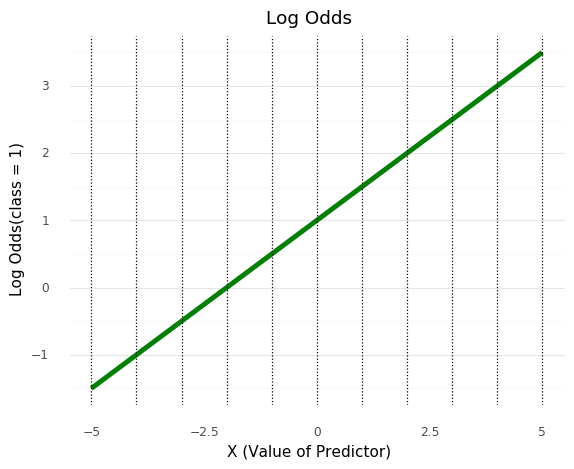

<ggplot: (8775275804323)>

In [19]:
(ggplot(out, aes(x = "x", y = "logodds")) + geom_line(color = "green", size = 2) + theme_minimal() +
labs(title = "Log Odds", x = "X (Value of Predictor)", y = "Log Odds(class = 1)") + 
geom_vline(xintercept = [-5,-4,-3,-2,-1,0,1,2,3,4,5], linetype = "dotted") +
theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank()))

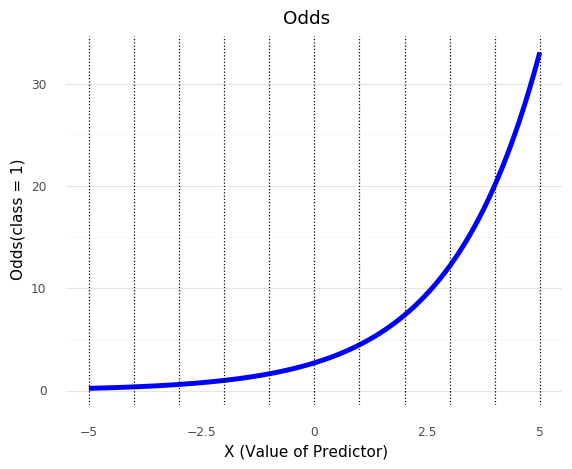

<ggplot: (8775275708344)>

In [20]:
(ggplot(out, aes(x = "x", y = "odds")) + geom_line(color = "blue", size = 2) + theme_minimal() +
labs(title = "Odds", x = "X (Value of Predictor)", y = "Odds(class = 1)")+ 
geom_vline(xintercept = [-5,-4,-3,-2,-1,0,1,2,3,4,5], linetype = "dotted")+
theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank()) )

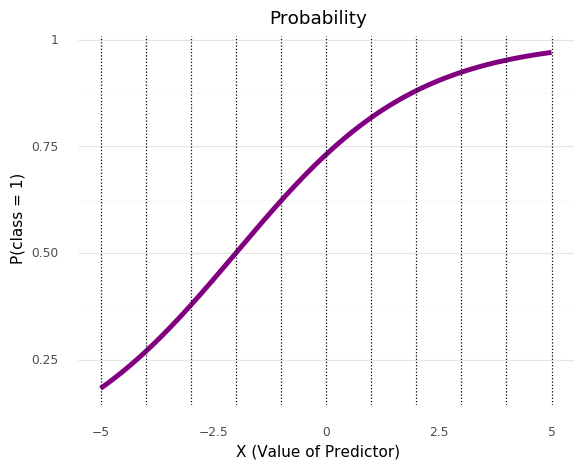

<ggplot: (8775275707218)>

In [21]:
(ggplot(out, aes(x = "x", y = "probabilities")) + geom_line(color = "purple", size = 2) + theme_minimal() +
labs(title = "Probability", x = "X (Value of Predictor)", y = "P(class = 1)")+ 
geom_vline(xintercept = [-5,-4,-3,-2,-1,0,1,2,3,4,5], linetype = "dotted")+
theme(panel_grid_major_x = element_blank(),
     panel_grid_minor_x = element_blank()))

### *Question*

Describe in detail how the graphs demonstrate what we learned in class: that the change in predicted probability in response to a 1 unit increase of our predictor is *not constant*?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


### YOUR ANSWER HERE 

The dotted vertical lines show us a 1 unit increase in our predictor variable. In the LO graph, we can see that for every 1 unit of X, our predicted LOs increase by `coef`. 

Similarly, when we look at the O graph, we can see that for every 1 extra unit of X, we multiply the predicted odds by $e^{coef}$. 

However, when we look at the P graph, the change for 1 extra unit of X is not the same for each extra unit of X. Towards the left of the graph, we see small increases, and towards the middle we get large increases, and then at the right hand side we again see small increases. The change in probability is NOT CONSTANT. it depends where on the x axis you start.